In [ ]:
# rotate
# brightness
# pixel drop
# translate
# rgb shift
# contrast
# blur
# shear
# lens

In [155]:
# importing relevant packages 

import torch 
from torchvision import models
import pandas as pd
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
import glob
import os
import cv2
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import json

In [156]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [157]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_2_1000')
image_data = pd.read_csv(os.path.join(images_dir, 'Kirigami_dataset_2_1000.csv'))

In [158]:
print(image_data.head(3))

       image_name      p1_x      p1_y      p2_x      p2_y      p3_x      p3_y  \
0  0image0000.jpg  0.115423  0.277946  0.512124  0.081549  0.900808  0.260981   
1  0image0001.jpg  0.103103  0.303101  0.482414  0.106966  0.862417  0.290306   
2  0image0002.jpg  0.092324  0.301343  0.489235  0.156462  0.875456  0.289927   

       p4_x      p4_y      p5_x  ...     p12_x     p12_y     p13_x     p13_y  \
0  0.907124  0.579452  0.517751  ...  0.578983  0.708468  0.594503  0.567082   
1  0.866217  0.611283  0.502872  ...  0.561157  0.706985  0.568230  0.587686   
2  0.874770  0.626714  0.490583  ...  0.550483  0.746341  0.563499  0.606076   

      p14_x     p14_y     p15_x     p15_y     p16_x     p16_y  
0  0.600941  0.430478  0.588429  0.295282  0.567786  0.161356  
1  0.571716  0.452370  0.559542  0.319492  0.539509  0.183248  
2  0.571159  0.464553  0.560680  0.328748  0.545606  0.196456  

[3 rows x 33 columns]


In [159]:
image_idx = 1

In [160]:
image_data.iloc[image_idx]['image_name']

'0image0001.jpg'

In [161]:
img_arr = cv2.imread(os.path.join(images_dir, image_data.iloc[image_idx]['image_name']))

In [162]:
img_arr.shape

(1944, 2592, 3)

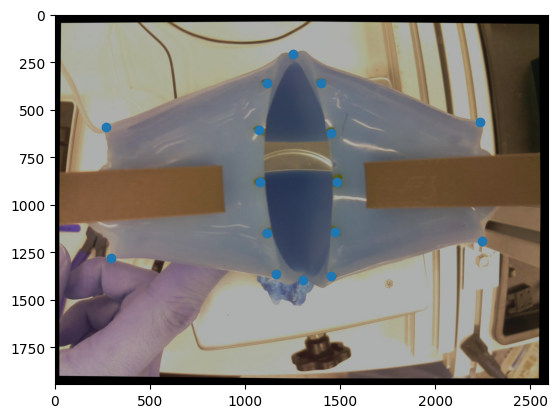

In [163]:
plt.imshow(img_arr)
x_points = image_data.iloc[image_idx][1:][::2]
y_points = image_data.iloc[image_idx][2:][::2]
x_width = img_arr.shape[1]
y_height = img_arr.shape[0]

plt.scatter(x_points*x_width, y_points*y_height)

In [164]:
class ImageDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df
        self.img_dir = img_dir
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        image = cv2.imread(img_path)
        label = self.df.iloc[idx, 1:]
        image = self.transform_image(image)
        return image.to(device), torch.tensor(label).to(device)
    
    def __len__(self):
        return self.df.shape[0]
    
    def transform_image(self, img):
        img = cv2.resize(img, (224,224))
        img_tensor = transforms.ToTensor()(img)
        img_mean = img_tensor.mean(dim = (1,2))
        img_std = img_tensor.std(dim = (1,2))
        
        img_normalised = transforms.Normalize(img_mean, img_std)(img_tensor)
        return img_normalised
    
    def load_img(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        img = cv2.imread(img_path)
        return img
    

In [165]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_2_1000')
print(images_dir)

/home/dell/Desktop/xxxx/Uni/Kirigami_project/Keypoint_detection_notebooks/Kirigami_dataset_2_1000


In [166]:
train_df, test_df = train_test_split(image_data, test_size=0.04)

In [167]:
print(train_df.shape)
print(test_df.shape)

(1152, 33)
(48, 33)


In [168]:
train_dataset = ImageDataset(train_df, images_dir)
test_dataset = ImageDataset(test_df, images_dir)

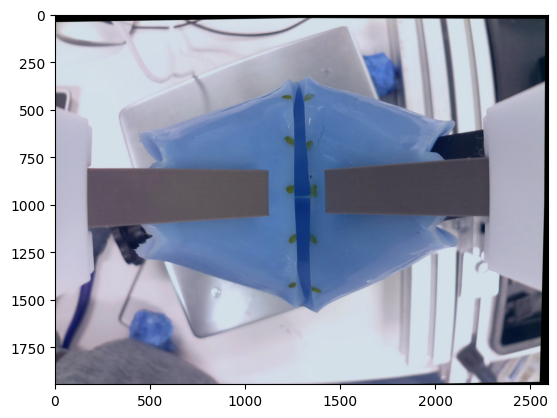

In [169]:
img = test_dataset.load_img(0)
plt.imshow(img)

In [170]:
img_tensor, labels = train_dataset[0]

In [171]:
labels

tensor([0.1675, 0.3926, 0.4633, 0.2453, 0.8055, 0.3280, 0.8134, 0.6685, 0.4937,
        0.8299, 0.1783, 0.6987, 0.4396, 0.2701, 0.4497, 0.3986, 0.4537, 0.5275,
        0.4621, 0.6549, 0.4653, 0.7826, 0.5187, 0.7802, 0.5130, 0.6585, 0.5089,
        0.5261, 0.4979, 0.3929, 0.4940, 0.2747], device='cuda:0',
       dtype=torch.float64)

In [172]:
img_tensor

tensor([[[-2.1698, -2.1698, -2.1698,  ..., -2.1698, -2.1698, -2.1698],
         [-2.1698, -2.1698, -2.1698,  ..., -2.1698, -2.1698, -2.1698],
         [-2.1698, -2.1698, -2.1698,  ..., -2.1698, -2.1698, -2.1698],
         ...,
         [-2.1698, -2.1698, -2.1698,  ..., -2.1698, -2.1698, -2.1698],
         [-2.1698, -2.1698, -2.1698,  ..., -2.1698, -2.1698, -2.1698],
         [-2.1698, -2.1698, -2.1698,  ..., -2.1698, -2.1698, -2.1698]],

        [[-2.2085, -2.2085, -2.2085,  ..., -2.2085, -2.2085, -2.2085],
         [-2.2085, -2.2085, -2.2085,  ..., -2.2085, -2.2085, -2.2085],
         [-2.2085, -2.2085, -2.2085,  ..., -2.2085, -2.2085, -2.2085],
         ...,
         [-2.2085, -2.2085, -2.2085,  ..., -2.2085, -2.2085, -2.2085],
         [-2.2085, -2.2085, -2.2085,  ..., -2.2085, -2.2085, -2.2085],
         [-2.2085, -2.2085, -2.2085,  ..., -2.2085, -2.2085, -2.2085]],

        [[-2.3590, -2.3590, -2.3590,  ..., -2.3590, -2.3590, -2.3590],
         [-2.3590, -2.3590, -2.3590,  ..., -2

In [173]:
img_np = img_tensor.cpu().numpy()
img_np

array([[[-2.169797 , -2.169797 , -2.169797 , ..., -2.169797 ,
         -2.169797 , -2.169797 ],
        [-2.169797 , -2.169797 , -2.169797 , ..., -2.169797 ,
         -2.169797 , -2.169797 ],
        [-2.169797 , -2.169797 , -2.169797 , ..., -2.169797 ,
         -2.169797 , -2.169797 ],
        ...,
        [-2.169797 , -2.169797 , -2.169797 , ..., -2.169797 ,
         -2.169797 , -2.169797 ],
        [-2.169797 , -2.169797 , -2.169797 , ..., -2.169797 ,
         -2.169797 , -2.169797 ],
        [-2.169797 , -2.169797 , -2.169797 , ..., -2.169797 ,
         -2.169797 , -2.169797 ]],

       [[-2.208549 , -2.208549 , -2.208549 , ..., -2.208549 ,
         -2.208549 , -2.208549 ],
        [-2.208549 , -2.208549 , -2.208549 , ..., -2.208549 ,
         -2.208549 , -2.208549 ],
        [-2.208549 , -2.208549 , -2.208549 , ..., -2.208549 ,
         -2.208549 , -2.208549 ],
        ...,
        [-2.208549 , -2.208549 , -2.208549 , ..., -2.208549 ,
         -2.208549 , -2.208549 ],
        [-2.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 224, 224)
(224, 224, 3)


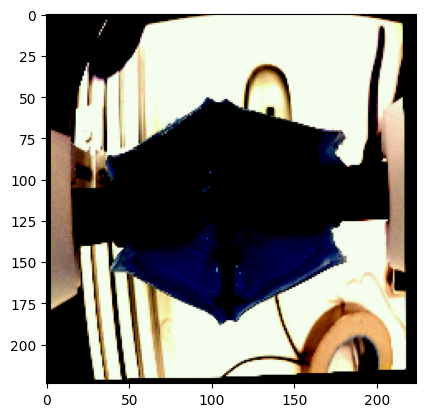

In [174]:
print(img_np.shape)
img_np_reverted = np.transpose(img_np, (1,2,0))
print(img_np_reverted.shape)
plt.imshow(img_np_reverted, clim=(-1, 1))

In [175]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

In [81]:
for img, points in train_dataloader:
  print(img.shape)
  print(points.shape)
  break

torch.Size([8, 3, 224, 224])
torch.Size([8, 32])


In [82]:
class VGG_model(nn.Module):
    def __init__(self):
        super(VGG_model, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        
        self.avgpool = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512,50, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.AdaptiveAvgPool2d(output_size=(8,8))
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(3200, 300),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(300, 6),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
        

In [83]:
# model = models.vgg16(pretrained=False)
model = VGG_model()

# from torchvision.models import resnet50
# model = resnet50(pretrained=False)

In [ ]:
# # making the weights non trainable

# for param in model.parameters():
#   param.requires_grad = False

In [84]:
from torch.nn.modules.activation import Sigmoid
from torch.nn.modules.pooling import AdaptiveAvgPool2d
pool_layer = nn.Sequential(
     nn.Conv2d(512,512, kernel_size=3, padding='same'),
     nn.LeakyReLU(0.1,inplace=True),
     nn.MaxPool2d(kernel_size=2, stride=2),
     nn.Conv2d(512,50, kernel_size=3, padding='same'),
     nn.LeakyReLU(0.1,inplace=True),
     nn.MaxPool2d(kernel_size=2, stride=2),
     nn.AdaptiveAvgPool2d(output_size=(8,8))
)

model.avgpool = pool_layer

final_predictor = nn.Sequential(
    nn.Linear(3200, 300),
    nn.LeakyReLU(0.1,inplace=True),
    nn.Dropout(0.3),
    nn.Linear(300, 32),
    nn.Sigmoid()
)

model.classifier = final_predictor

In [85]:
# model.load_state_dict(torch.load('./Model_2_2000_VGG_Leaky_60_epoch'))

<All keys matched successfully>

In [ ]:
# from torch.nn.modules.activation import Sigmoid
# from torch.nn.modules.pooling import AdaptiveAvgPool2d
# # pool_layer = nn.Sequential(
# #      nn.Conv2d(512,512, kernel_size=3, padding='same'),
# #      nn.ReLU(inplace=True),
# #      nn.MaxPool2d(kernel_size=2, stride=2),
# #      nn.Conv2d(512,50, kernel_size=3, padding='same'),
# #      nn.ReLU(inplace=True),
# #      nn.MaxPool2d(kernel_size=2, stride=2),
# #      nn.AdaptiveAvgPool2d(output_size=(8,8))
# # )

# # model.avgpool = pool_layer

# final_predictor = nn.Sequential(
#     nn.Linear(2048, 300),
#     nn.ReLU(inplace=True),
#     nn.Dropout(0.3),
#     nn.Linear(300, 32),
#     nn.Sigmoid()
# )

# model.fc = final_predictor

In [86]:
model = model.to(device)

In [87]:
summary(model, torch.rand(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─LeakyReLU: 2-2                    [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─LeakyReLU: 2-4                    [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─LeakyReLU: 2-7                    [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─LeakyReLU: 2-9                    [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─LeakyReLU: 2-12                   [-1, 256, 56, 56]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─LeakyReLU: 2-2                    [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─LeakyReLU: 2-4                    [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─LeakyReLU: 2-7                    [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─LeakyReLU: 2-9                    [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─LeakyReLU: 2-12                   [-1, 256, 56, 56]      

In [176]:
# getting the optimizer and loss_function 

def get_essentials():
  loss_fun = nn.L1Loss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
  return loss_fun, optimizer

In [177]:
# defining batch_train and accuracy functions


def train_batch(data, model, loss_fun, optimizer):
  model.train()
  img, true_points = data
  pred_points = model(img)
  loss_val = loss_fun(pred_points, true_points)
  loss_val.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss_val.item()

@torch.no_grad()
def val_batch(data, model, loss_fun, optimizer):
  model.eval()
  img, true_points = data
  pred_points = model(img)
  loss_val = loss_fun(pred_points, true_points)
  return loss_val.item()


In [178]:
epochs = 61
loss_fun, optimizer = get_essentials()

In [179]:
# training and validation loops 


train_epoch, val_epoch = [], []
for epoch in tqdm(range(epochs)):
  train_batch_losses, val_batch_losses = [], []
  for data in train_dataloader:
    train_batch_loss = train_batch(data, model, loss_fun, optimizer)
    train_batch_losses.append(train_batch_loss)
  for data in test_dataloader:
    val_batch_loss = val_batch(data, model, loss_fun, optimizer)
    val_batch_losses.append(val_batch_loss)
  train_epoch.append(np.mean(train_batch_losses))
  val_epoch.append(np.mean(val_batch_losses))
  
  with open("Model_2_1000_output.txt", "a") as f:
    f.write(str([train_batch_loss, val_batch_loss]))
    f.write("\n")
    
  print(train_batch_loss, val_batch_loss)

  if (100+epoch) % 20 == 0:
    torch.save(model.state_dict(), './Model_2_1000_VGG_Leaky_' + str(100+epoch) + '_epoch')

  2%|▋                                           | 1/61 [00:56<56:08, 56.14s/it]

0.00874180059066012 0.005341351256909871


  3%|█▍                                          | 2/61 [01:54<56:31, 57.48s/it]

0.008525252864461905 0.003088296259532517


  5%|██▏                                         | 3/61 [02:54<56:29, 58.45s/it]

0.00842263024128239 0.004959255965773299


  7%|██▉                                         | 4/61 [03:53<55:40, 58.61s/it]

0.009049728401502194 0.006143287391067316


  8%|███▌                                        | 5/61 [04:51<54:41, 58.59s/it]

0.012228791159432621 0.007037863648368809


 10%|████▎                                       | 6/61 [05:50<53:47, 58.68s/it]

0.009741067428308514 0.0040373399904552795


 11%|█████                                       | 7/61 [06:49<52:58, 58.86s/it]

0.008748809577144665 0.004425843845159203


 13%|█████▊                                      | 8/61 [07:48<51:53, 58.74s/it]

0.010385523120025657 0.005654224205640342


 15%|██████▍                                     | 9/61 [08:48<51:16, 59.16s/it]

0.00880665191558895 0.005100613873969634


 16%|███████                                    | 10/61 [09:47<50:13, 59.09s/it]

0.007265859743587964 0.006013662650639816


 18%|███████▊                                   | 11/61 [10:45<49:02, 58.85s/it]

0.013909280429503904 0.007580254673256141


 20%|████████▍                                  | 12/61 [11:46<48:30, 59.41s/it]

0.009657610237510706 0.004814264267468052


 21%|█████████▏                                 | 13/61 [12:45<47:26, 59.31s/it]

0.008827660281593395 0.004743268317117415


 23%|█████████▊                                 | 14/61 [13:45<46:38, 59.55s/it]

0.0088812979382261 0.004171580315046146


 25%|██████████▌                                | 15/61 [14:45<45:42, 59.62s/it]

0.007976127186145751 0.005117470264665957


 26%|███████████▎                               | 16/61 [15:44<44:42, 59.60s/it]

0.010079786720102395 0.005565683726706605


 28%|███████████▉                               | 17/61 [16:43<43:28, 59.29s/it]

0.007626581019432444 0.004964991766594682


 30%|████████████▋                              | 18/61 [17:41<42:14, 58.95s/it]

0.008645667991795853 0.004018936899463995


 31%|█████████████▍                             | 19/61 [18:39<40:59, 58.57s/it]

0.008393733942302176 0.008375866759843599


 33%|██████████████                             | 20/61 [19:37<39:53, 58.39s/it]

0.009401601540364509 0.009255636847260473


 34%|██████████████▊                            | 21/61 [20:35<38:59, 58.49s/it]

0.00847718969297755 0.006088500735785138


 36%|███████████████▌                           | 22/61 [21:34<38:07, 58.65s/it]

0.008865028896598903 0.004718238806075708


 38%|████████████████▏                          | 23/61 [22:33<37:13, 58.77s/it]

0.008444246504678355 0.0036039987573068463


 39%|████████████████▉                          | 24/61 [23:32<36:09, 58.63s/it]

0.009414576799839897 0.005963000900374675


 41%|█████████████████▌                         | 25/61 [24:30<35:05, 58.48s/it]

0.008894805850457717 0.003379123140208603


 43%|██████████████████▎                        | 26/61 [25:28<34:06, 58.48s/it]

0.009051934487857509 0.004440804671489202


 44%|███████████████████                        | 27/61 [26:27<33:08, 58.47s/it]

0.009309782596610734 0.007670445758551619


 46%|███████████████████▋                       | 28/61 [27:25<32:09, 58.47s/it]

0.007647070186513467 0.0051972704044615965


 48%|████████████████████▍                      | 29/61 [28:24<31:11, 58.48s/it]

0.008454288002557393 0.005712681928633992


 49%|█████████████████████▏                     | 30/61 [29:22<30:12, 58.48s/it]

0.0072214530354363475 0.004354470165489158


 51%|█████████████████████▊                     | 31/61 [30:20<29:12, 58.42s/it]

0.011860481578863588 0.004700717175913728


 52%|██████████████████████▌                    | 32/61 [31:19<28:17, 58.52s/it]

0.008155799004685046 0.0034308481215751807


 54%|███████████████████████▎                   | 33/61 [32:17<27:09, 58.18s/it]

0.008465848803909503 0.004515457300802276


 56%|███████████████████████▉                   | 34/61 [33:14<26:05, 57.97s/it]

0.008603768089606705 0.003774202559694599


 57%|████████████████████████▋                  | 35/61 [34:13<25:13, 58.20s/it]

0.008580951124927266 0.003974946238185199


 59%|█████████████████████████▍                 | 36/61 [35:12<24:24, 58.59s/it]

0.008851325686712288 0.00381615418844293


 61%|██████████████████████████                 | 37/61 [36:12<23:30, 58.77s/it]

0.008213937660728126 0.0069802398416299715


 62%|██████████████████████████▊                | 38/61 [37:10<22:32, 58.82s/it]

0.008295502361156452 0.004743175897301756


 64%|███████████████████████████▍               | 39/61 [38:09<21:29, 58.62s/it]

0.009438204054324717 0.00452396409229224


 66%|████████████████████████████▏              | 40/61 [39:07<20:29, 58.53s/it]

0.009390328994649155 0.003326152686422615


 67%|████████████████████████████▉              | 41/61 [40:05<19:29, 58.46s/it]

0.00957027086130053 0.005519336426591437


 69%|█████████████████████████████▌             | 42/61 [41:04<18:30, 58.42s/it]

0.008471541761548953 0.005399078117164346


 70%|██████████████████████████████▎            | 43/61 [42:02<17:32, 58.49s/it]

0.010009220145470144 0.005958082959739958


 72%|███████████████████████████████            | 44/61 [43:01<16:34, 58.53s/it]

0.007925658045204589 0.00803266858228589


 74%|███████████████████████████████▋           | 45/61 [43:58<15:31, 58.19s/it]

0.007251887434079974 0.003332877748609104


 75%|████████████████████████████████▍          | 46/61 [44:57<14:34, 58.32s/it]

0.011844857577395255 0.006954067103557317


 77%|█████████████████████████████████▏         | 47/61 [45:55<13:37, 58.41s/it]

0.008259167439006801 0.00399432184234977


 79%|█████████████████████████████████▊         | 48/61 [46:54<12:41, 58.57s/it]

0.009404334521887573 0.005962304014690435


 80%|██████████████████████████████████▌        | 49/61 [47:53<11:43, 58.65s/it]

0.011348785076668293 0.005812010734108531


 82%|███████████████████████████████████▏       | 50/61 [48:52<10:44, 58.59s/it]

0.008030329233528883 0.004436265352636048


 84%|███████████████████████████████████▉       | 51/61 [49:51<09:46, 58.67s/it]

0.009255685693004188 0.0038080755246364985


 85%|████████████████████████████████████▋      | 52/61 [50:49<08:46, 58.49s/it]

0.008546280142376642 0.004215502540987658


 87%|█████████████████████████████████████▎     | 53/61 [51:47<07:47, 58.43s/it]

0.00847859093470964 0.0037132905493497954


 89%|██████████████████████████████████████     | 54/61 [52:45<06:49, 58.45s/it]

0.006666150890952256 0.004455421532234484


 90%|██████████████████████████████████████▊    | 55/61 [53:45<05:52, 58.70s/it]

0.009160409188108542 0.0050856814558123305


 92%|███████████████████████████████████████▍   | 56/61 [54:43<04:53, 58.72s/it]

0.009822187270243657 0.004492347225249284


 93%|████████████████████████████████████████▏  | 57/61 [55:42<03:55, 58.81s/it]

0.007777757189636633 0.005042213325646846


 95%|████████████████████████████████████████▉  | 58/61 [56:41<02:56, 58.77s/it]

0.009432182048745495 0.003749568773177702


 97%|█████████████████████████████████████████▌ | 59/61 [57:39<01:57, 58.57s/it]

0.0074133825148192676 0.005410252811252531


 98%|██████████████████████████████████████████▎| 60/61 [58:38<00:58, 58.64s/it]

0.0073288146566182245 0.007079416269065634


100%|███████████████████████████████████████████| 61/61 [59:36<00:00, 58.64s/it]

0.0076092883144600505 0.0033249747133487296


In [ ]:
torch.save(model.state_dict(), './Model_2800_VGG_Leaky_80_epoch')

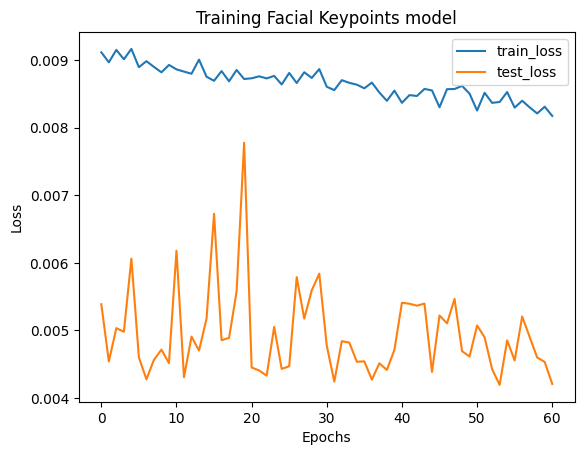

In [180]:
plt.plot(range(epochs), train_epoch, label="train_loss")
plt.plot(range(epochs), val_epoch, label="test_loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Facial Keypoints model")
plt.show()

# Displaying the results

In [181]:
def transform_image(img):
    img = cv2.resize(img, (224,224))
    img_tensor = transforms.ToTensor()(img)
    img_mean = img_tensor.mean(dim = (1,2))
    img_std = img_tensor.std(dim = (1,2))
        
    img_normalised = transforms.Normalize(img_mean, img_std)(img_tensor)
    return img_normalised

In [223]:
img_path = os.path.join(os.getcwd(), 'Validation_2/image11.jpg')
original_img = cv2.imread(img_path)
test_img = transform_image(original_img)
test_img = test_img.to(device)

Facial_key_points = model(test_img[None]).flatten().detach().cpu()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


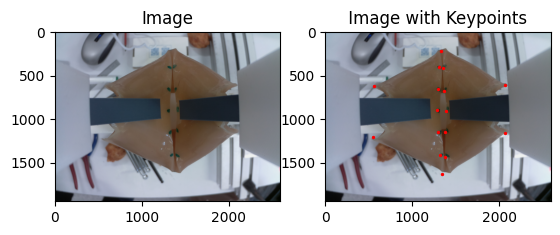

In [224]:
# index = 0

plt.subplot(121)
plt.title("Image")
original_img = original_img[:,:,::-1]                                                              
plt.imshow(original_img)
plt.subplot(122)
plt.title(" Image with Keypoints ")
plt.imshow(original_img)

x_points = Facial_key_points.numpy()[0::2]
y_points = Facial_key_points.numpy()[1::2]
plt.scatter(x_points*original_img.shape[1], y_points*original_img.shape[0], s = 2, c=(1,0,0))                       # scaling the keypoints with image dimension
plt.show()

In [ ]:
print(Facial_key_points)

In [ ]:
x_points = Facial_key_points.numpy()[0::2]
y_points = Facial_key_points.numpy()[1::2]
print(x_points)
print(y_points)

# width = img_arr.shape[0]
# height = img_arr.shape[1]

# plt.scatter(x_points*x_width, y_points*y_height)

In [ ]:
for i in range(10):
    
    folder = 'asdsadsd'
    print(folder + str(i).zfill(2)+'.jpg')